# Фреймворк H2O

Фреймворк H20 поддерживает автоматизацию машинного обучения [AutoML](https://h2o.ai/platform/h2o-automl/), как в программном интерфейсе для R и Python, так и в web-GUI.

Видео по материалам: https://www.youtube.com/watch?v=91QljBnvM7s

In [1]:
# Для мониторинга GPU
!nvidia-smi

Mon May 13 13:27:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
%%capture
# установка и Runtime библиотеки Java
!apt-get install default-jre
!java -version

In [3]:
# установим фреймворк
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.7 MB/s eta 0:00:00


In [4]:
 # подключим
 import h2o

Командой [`init()`](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/starting-h2o.html#from-python) создается и подключается (здесь локальный) сервер.  

In [5]:
# инициализируем
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqdkdjw2t
  JVM stdout: /tmp/tmpqdkdjw2t/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqdkdjw2t/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 29 days
H2O_cluster_name:,H2O_from_python_unknownUser_zw1yfn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


[H2OAutoML](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html) позволяет автоматизировать перебор моделей и их гиперпараметров.

In [6]:
from h2o.automl import H2OAutoML # подключим

In [7]:
# данные для обучения
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
# столбцы
churn_df.types

{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [9]:
# статистика
churn_df.describe()

Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [10]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15]) # разделяем на обучение, тест и проверку

In [11]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes
5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.5,2686.05,No


In [12]:
y = "Churn" # целевой столбец
x = churn_df.columns # входные признаки
x.remove(y) # целевой удаляем
x.remove("customerID") # этот тоже лишний так как не несет полезной информации

Будут обучаться разные модели и подбираться их настройки.

Доступны алгоритмы:
* деревья решений,
* обобщенные линейные модели, включая регуляризацию,
* модели градиентного бустинга
* персептроны
* ансамбли перечисленных


In [13]:
# создаем модел(и)
aml = H2OAutoML(max_models = 10, # максимальное число моделей
                seed = 10,
                exclude_algos = ["StackedEnsemble", "DeepLearning"], # какие не использовать
                verbosity="info",
                nfolds=0) # кросвалидацию отключим, так как есть отдельная выборка


In [14]:
# проверим GPU
!nvidia-smi

Mon May 13 13:34:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [15]:
# запускаем обучение моделей
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
13:35:03.808: Project: AutoML_1_20240513_133503
13:35:03.809: Cross-validation disabled by user: no fold column nor nfolds > 1.
13:35:03.809: Setting stopping tolerance adaptively based on the training frame: 0.014234965584343246
13:35:03.809: Build control seed: 10
13:35:03.810: training frame: Frame key: AutoML_1_20240513_133503_training_py_2_sid_a196    cols: 21    rows: 4935  chunks: 8    size: 266448  checksum: -2773760664357758550
13:35:03.810: validation frame: Frame key: py_4_sid_a196    cols: 21    rows: 1054  chunks: 8    size: 138890  checksum: -1070887602882082588
13:35:03.811: leaderboard frame: Frame key: py_4_sid_a196    cols: 21    rows: 1054  chunks: 8    size: 138890  checksum: -1070887602882082588
13:35:03.811: blending frame: NULL
13:35:03.811: response column: Churn
13:35:03.811: fold column: null
13:35:03.811: weights column: null
13:35:03.831: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 9

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240513_133503


GLM Model: summary
    family    link    regularization               lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    binomial  logit   Ridge ( lambda = 0.002994 )  nlambda = 30, lambda.max = 15.864, lambda.min = 0.002994, lambda.1se = -1.0  45                            45                             38                      AutoML_1_20240513_133503_training_py_2_sid_a196

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13284198455465207
RMSE: 0.3644749436582055
LogLoss: 0.40780545937775636
AUC: 0.850754580593429
AUCPR: 0.6557785279134016
Gini: 0.701509161186858
Null degrees of freedom: 4934
Residual degrees of freedom: 4889
Null deviance: 5676.678897494505
Residual deviance: 4025.039884058455
AIC: 4117.039884058455

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3030627956021135
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     2838  804    0.2208   (804.0/3642.0)
Yes    308   985    0.2382   (308.0/1293.0)
Total  3146  1789   0.2253   (1112.0/4935.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.303063     0.639195  218
max f2                       0.156185     0.75188   296
max f0point5                 0.524601     0.639838  126
max accuracy                 0.524601     0.809726  126
max precision                0.865098     1         0
max recall                   0.0129515    1         389
max specificity              0.865098     1         0
max absolute_mcc             0.303063     0.494893  218
max min_per_class_accuracy   0.293728     0.770302  223
max mean_per_class_accuracy  0.258953     0.772054  240
max tns                      0.865098     3642      0
max fns                      0.865098     1292      0
max fps                      0.00356031   3642      399
max tps                      0.0129515    1293      389
max tnr                      0.865098     1         0
max fnr                      0.865098     0.999227  0
max fpr                      0.00356031   1         399
max tpr                      0.0129515    1         389

Gains/Lift Table: Avg response rate: 26.20 %, avg score: 26.20 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101317                   0.791289           3.51137    3.51137            0.92             0.818438    0.92                        0.818438            0.0355762       0.0355762                  251.137   251.137            0.0344779
2        0.0200608                   0.765895           3.11568    3.31552            0.816327         0.780284    0.868687                    0.799554            0.0309358       0.066512                   211.568   231.552            0.0629425
3        0.0301925                   0.744447           2.51903    3.04824            0.66             0.753647    0.798658                    0.784149            0.025522        0.092034                

Проанализируйте вывод выше. Какие метрики измерялись? Какие результаты получились?

In [16]:
!nvidia-smi

Mon May 13 13:38:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0              30W /  70W |    179MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [17]:
# результаты (отсортированы)
lb = aml.leaderboard

In [18]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_1_20240513_133503,0.843671,0.425719,0.686039,0.234815,0.368485,0.135781
GBM_1_AutoML_1_20240513_133503,0.843299,0.424065,0.677082,0.219507,0.369072,0.136214
XRT_1_AutoML_1_20240513_133503,0.841812,0.425188,0.685261,0.238926,0.369645,0.136637
GBM_2_AutoML_1_20240513_133503,0.83858,0.430969,0.662405,0.230966,0.372349,0.138644
XGBoost_3_AutoML_1_20240513_133503,0.83288,0.440727,0.655045,0.24073,0.376074,0.141432
GBM_3_AutoML_1_20240513_133503,0.830727,0.443046,0.655009,0.237326,0.378343,0.143143
GBM_4_AutoML_1_20240513_133503,0.829659,0.44436,0.662576,0.246632,0.377759,0.142702
DRF_1_AutoML_1_20240513_133503,0.82919,0.496692,0.656797,0.250911,0.3771,0.142204
XGBoost_1_AutoML_1_20240513_133503,0.823214,0.452184,0.642119,0.247924,0.382464,0.146279
XGBoost_2_AutoML_1_20240513_133503,0.818982,0.468943,0.622991,0.253576,0.388146,0.150657


In [19]:
# используем "лучшую" модель для теста
churn_pred=aml.leader.predict(churn_test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [20]:
churn_pred.head()

predict,No,Yes
Yes,0.451392,0.548608
No,0.963342,0.0366583
Yes,0.432674,0.567326
No,0.930383,0.0696168
No,0.981226,0.0187744
No,0.983078,0.0169217
No,0.796835,0.203165
Yes,0.378662,0.621338
No,0.980711,0.0192894
No,0.906312,0.0936877


In [21]:
# и оценки метрик на тесте
aml.leader.model_performance(churn_test)

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.14251032756831503
RMSE: 0.3775054007141024
LogLoss: 0.4387685387289378
AUC: 0.8317196112561647
AUCPR: 0.6332040409145109
Gini: 0.6634392225123293
Null degrees of freedom: 1053
Residual degrees of freedom: 1008
Null deviance: 1236.9390096037434
Residual deviance: 924.9240796406009
AIC: 1016.9240796406009

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27813900334475916
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     572   194    0.2533   (194.0/766.0)
Yes    64    224    0.2222   (64.0/288.0)
Total  636   418    0.2448   (258.0/1054.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.278139     0.634561  225
max f2                       0.151166     0.756279  287
max f0point5                 0.550588     0.631868  112
max accuracy                 0.550588     0.797913  112
max precision                0.864718     1         0
max recall                   0.00682664   1         395
max specificity              0.864718     1         0
max absolute_mcc             0.278139     0.477805  225
max min_per_class_accuracy   0.293618     0.753264  218
max mean_per_class_accuracy  0.246781     0.763952  237
max tns                      0.864718     766       0
max fns                      0.864718     287       0
max fps                      0.00351406   766       399
max tps                      0.00682664   288       395
max tnr                      0.864718     1         0
max fnr                      0.864718     0.996528  0
max fpr                      0.00351406   1         399
max tpr                      0.00682664   1         395

Gains/Lift Table: Avg response rate: 27.32 %, avg score: 26.99 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0104364                   0.803797           3.32702   3.32702            0.909091         0.827092    0.909091                    0.827092            0.0347222       0.0347222                  232.702   232.702            0.0334167
2        0.0208729                   0.781784           2.32891   2.82797            0.636364         0.790865    0.772727                    0.808978            0.0243056       0.0590278                  132.891   182.797            0.0525004
3        0.0303605                   0.758014           2.92778   2.85916            0.8              0.771353    0.78125                     0.797221            0.0277778       0.0868056                  192.778   185.916            0.0776672
4        0.040797                    0.739549           2.66162   2.80862            0.727273         0.748636    0.767442                    0.784792            0.0277778       0.114583                   166.162   180.862            0.101529
5        0.0502846                   0.729959           2.92778   2.83111            0.8              0.733791    0.773585                    0.775169            0.0277778       0.142361                   192.778   183.111            0.126695
6        0.100569                    0.654097           2.4168    2.62395            0.660377         0.691751    0.716981                    0.73346             0.121528        0.263889                   141.68    162.395            0.224724
7        0.149905                    0.593407           2.46327   2.57107            0.673077         0.623809    0.702532                

In [22]:
# список моделей
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [23]:
model_ids

['GLM_1_AutoML_1_20240513_133503',
 'GBM_1_AutoML_1_20240513_133503',
 'XRT_1_AutoML_1_20240513_133503',
 'GBM_2_AutoML_1_20240513_133503',
 'XGBoost_3_AutoML_1_20240513_133503',
 'GBM_3_AutoML_1_20240513_133503',
 'GBM_4_AutoML_1_20240513_133503',
 'DRF_1_AutoML_1_20240513_133503',
 'XGBoost_1_AutoML_1_20240513_133503',
 'XGBoost_2_AutoML_1_20240513_133503']

In [24]:
# информация о любой модели
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20240513_133503


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10475612550143226
RMSE: 0.3236605096415568
LogLoss: 0.32773886439768257
Mean Per-Class Error: 0.1738893751807668
AUC: 0.9133785690957051
AUCPR: 0.7862653040218496
Gini: 0.8267571381914103

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3709479793906212
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3119  523    0.1436   (523.0/3642.0)
Yes    264   1029   0.2042   (264.0/1293.0)
Total  3383  1552   0.1595   (787.0/4935.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.370948     0.723374  201
max f2                       0.198983     0.813751  275
max f0point5                 0.553904     0.7324    131
max accuracy                 0.48303      0.852482  158
max precision                0.979282     1         0
max recall                   0.00872967   1         389
max specificity              0.979282     1         0
max absolute_mcc             0.376493     0.61787   199
max min_per_class_accuracy   0.335488     0.8314    217
max mean_per_class_accuracy  0.326247     0.832726  221
max tns                      0.979282     3642      0
max fns                      0.979282     1291      0
max fps                      0.00144474   3642      399
max tps                      0.00872967   1293      389
max tnr                      0.979282     1         0
max fnr                      0.979282     0.998453  0
max fpr                      0.00144474   1         399
max tpr                      0.00872967   1         389

Gains/Lift Table: Avg response rate: 26.20 %, avg score: 26.37 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101317                   0.913436           3.81671    3.81671            1                0.932719    1                           0.932719            0.0386698       0.0386698                  281.671   281.671            0.0386698
2        0.0200608                   0.88523            3.66092    3.7396             0.959184         0.899024    0.979798                    0.916041            0.0363496       0.0750193                  266.092   273.96             0.0744702
3        0.0301925                   0.86409            3.51137    3.66301            0.92             0.873774    0.959732                    0.901858            0.0355762       0.110596                   251.137   266.301            0.108948
4        0.0403242                   0.829867           3.28237    3.56737            0.86             0.846048    0.934673                    0.887835            0.033256        0.143852                   228.237   256.737            0.140282
5        0.0500507                   0.810395           3.41913    3.53856            0.895833         0.816908    0.927126                    0.874052            0.033256        0.177108                   241.913   253.856            0.172165
6        0.100101                    0.695015           3.13681    3.33769            0.821862         0.749024    0.874494                    0.811538            0.156999        0.334107                   213.681   233.769            0.317083
7        0.150152                    0.603715           2.70414    3.126

In [25]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [26]:
# параметры модели
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_1_20240513_133503',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_1_20240513_133503'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240513_133503_training_py_2_sid_a196',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240513_133503_training_py_2_sid_a196'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240513_133503_training_py_2_sid_a196',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240513_133503_training_py_2_sid_a196'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schem

In [27]:
# поддерживаются модели XGBoost, можно конвертировать в них
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 3.0,
  'nthread': 2,
  'seed': 18,
  'max_bin': 256,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'gpu_id': 0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'gpu_hist'},
 30)

In [28]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20240513_133503


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10475612550143226
RMSE: 0.3236605096415568
LogLoss: 0.32773886439768257
Mean Per-Class Error: 0.1738893751807668
AUC: 0.9133785690957051
AUCPR: 0.7862653040218496
Gini: 0.8267571381914103

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3709479793906212
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3119  523    0.1436   (523.0/3642.0)
Yes    264   1029   0.2042   (264.0/1293.0)
Total  3383  1552   0.1595   (787.0/4935.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.370948     0.723374  201
max f2                       0.198983     0.813751  275
max f0point5                 0.553904     0.7324    131
max accuracy                 0.48303      0.852482  158
max precision                0.979282     1         0
max recall                   0.00872967   1         389
max specificity              0.979282     1         0
max absolute_mcc             0.376493     0.61787   199
max min_per_class_accuracy   0.335488     0.8314    217
max mean_per_class_accuracy  0.326247     0.832726  221
max tns                      0.979282     3642      0
max fns                      0.979282     1291      0
max fps                      0.00144474   3642      399
max tps                      0.00872967   1293      389
max tnr                      0.979282     1         0
max fnr                      0.979282     0.998453  0
max fpr                      0.00144474   1         399
max tpr                      0.00872967   1         389

Gains/Lift Table: Avg response rate: 26.20 %, avg score: 26.37 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101317                   0.913436           3.81671    3.81671            1                0.932719    1                           0.932719            0.0386698       0.0386698                  281.671   281.671            0.0386698
2        0.0200608                   0.88523            3.66092    3.7396             0.959184         0.899024    0.979798                    0.916041            0.0363496       0.0750193                  266.092   273.96             0.0744702
3        0.0301925                   0.86409            3.51137    3.66301            0.92             0.873774    0.959732                    0.901858            0.0355762       0.110596                   251.137   266.301            0.108948
4        0.0403242                   0.829867           3.28237    3.56737            0.86             0.846048    0.934673                    0.887835            0.033256        0.143852                   228.237   256.737            0.140282
5        0.0500507                   0.810395           3.41913    3.53856            0.895833         0.816908    0.927126                    0.874052            0.033256        0.177108                   241.913   253.856            0.172165
6        0.100101                    0.695015           3.13681    3.33769            0.821862         0.749024    0.874494                    0.811538            0.156999        0.334107                   213.681   233.769            0.317083
7        0.150152                    0.603715           2.70414    3.126

In [29]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [30]:
# матрица потерь (есть практически у всех классификаторов)
out.confusion_matrix()

,No,Yes,Error,Rate
No,3119.0,523.0,0.1436,(523.0/3642.0)
Yes,264.0,1029.0,0.2042,(264.0/1293.0)
Total,3383.0,1552.0,0.1595,(787.0/4935.0)


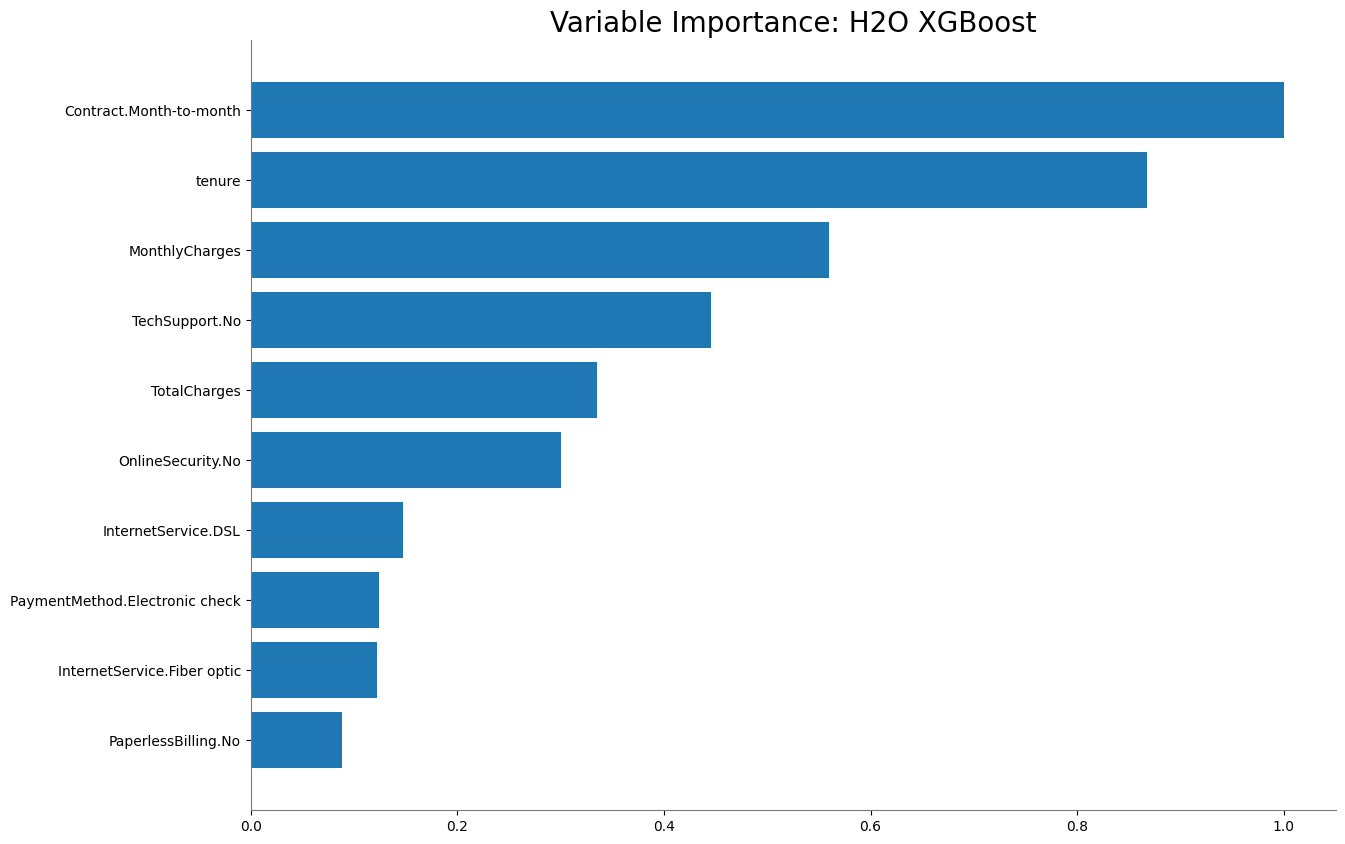

<Figure size 640x480 with 0 Axes>

In [31]:
# Деревья позволяют оценить важность параметров
out.varimp_plot()

Сохранить модель можно в [MOJO](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/mojo-quickstart.html?highlight=download_mojo) формате.

In [32]:
aml.leader.download_mojo(path = "./")

'/content/GLM_1_AutoML_1_20240513_133503.zip'

# Задания

* Изучите другие возможности и модели H2O.
* Добавьте в эксперимент модели нейронных сетей.
* Проведите кросс-валидацию с разным числом сегментов и сравните результаты.